# Data Challenge - Credit Card Customer Segmentation

___

You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce
costs associated with signup incentives by offering credit cards with carefully targeted benefits
that will attract new cardholders. As a first step, she would like you to examine cardholder data
collected over the last 6 months in order to understand the various kinds of users who use the
company’s products. Sh/e is especially interested in getting an idea of which benefits to
associate with each new card offering.
___

## The Data

The Data
The data consists of a csv file with 8950 rows (one for each cardholder) organized in columns
with descriptive headers.
Key to column labels:
* CUST_ID : Credit card holder ID
* BALANCE : Monthly average balance (based on daily balance averages)
* BALANCE_FREQUENCY : Ratio of last 12 months with balance
* PURCHASES : Total purchase amount spent during last 12 months
* ONEOFF_PURCHASES : Total amount of one-off purchases
* INSTALLMENTS_PURCHASES : Total amount of installment purchases
* CASH_ADVANCE : Total cash-advance amount
* PURCHASES_ FREQUENCY : Frequency of purchases (percentage of months with at least one purchase)
* ONEOFF_PURCHASES_FREQUENCY : Frequency of one-off-purchases
* PURCHASES_INSTALLMENTS_FREQUENCY : Frequency of installment purchases
* CASH_ADVANCE_ FREQUENCY : Cash-Advance frequency
* CASH_ADVANCE_TRX : Average amount of Cash-Advance transaction
* PURCHASES_TRX : Average amount per purchase transaction
* CREDIT_LIMIT : Credit limit
* PAYMENTS : Total payments (due amount paid by the customer to decrease their statement balance) in the period
* MINIMUM_PAYMENTS: Minimum payment required on statement (average?)
* PRC_FULL_PAYMENT: percent full payment (percent of balance they pay off each months?)
* TENURE: months (in the last year) they have been with company

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('cc_info.csv')

**Check the head of the data**

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## EDA

### check for duplicates

In [6]:
print(len(df['CUST_ID']))
print(len(df['CUST_ID'].unique()))

8950
8950


In [7]:
# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", df.isnull().sum().values.sum())

# what columns
df.isnull().any()


Missing values :   314


CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [8]:
# check out these two columns: how many values are missing?
df['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8637
True      313
Name: MINIMUM_PAYMENTS, dtype: int64

In [9]:
# check out these two columns: how many values are missing?
df['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

only one values is missing from credit limit, the rest from minimum payments

(0.0, 10)

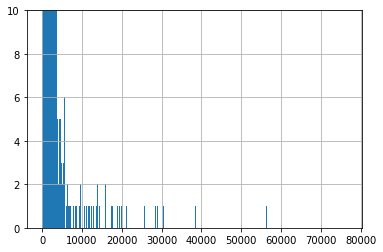

In [10]:
df['MINIMUM_PAYMENTS'].hist(bins=1000)
plt.ylim(ymax = 10)

In [11]:
# impute missing values for minimum payments with median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace = True)

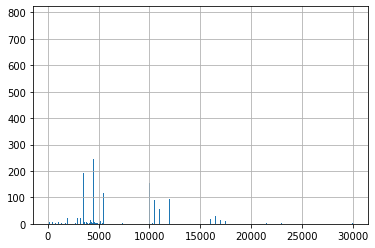

In [12]:
df['CREDIT_LIMIT'].hist(bins=1000)
#plt.ylim(ymax = 10)

In [13]:
# impute missing value for credit limit with median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace = True)

In [14]:
# printing total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n", df.nunique())


Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


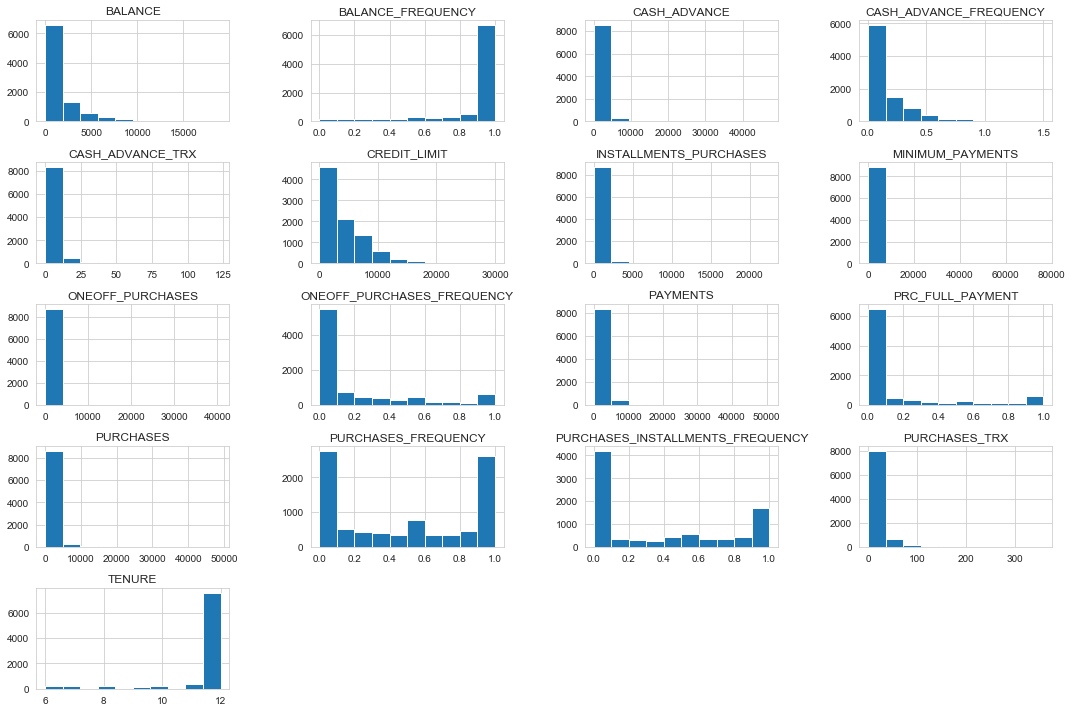

In [16]:
# plot histograms for each features
sns.set_style('whitegrid')
df.hist(figsize=(15,10))
plt.tight_layout()

data are skewed and have massively different ranges

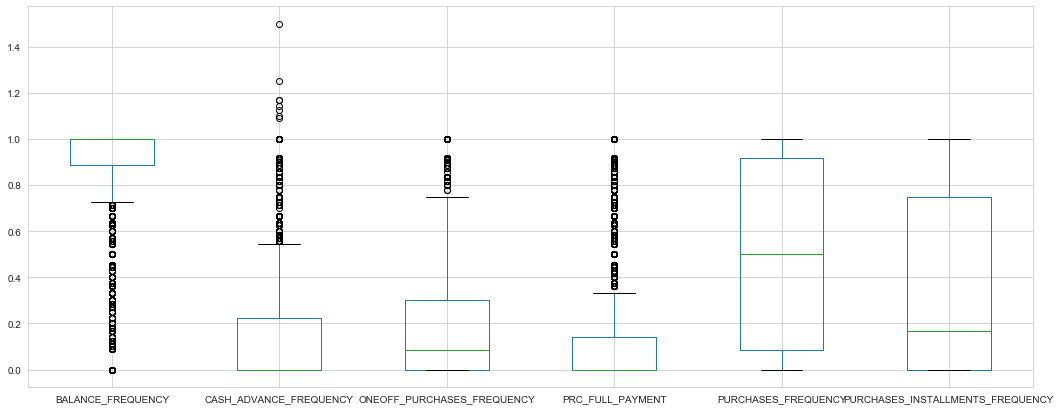

In [17]:
# what is the distribition of frequency variables
df[['BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT', 
    'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']].plot.box(figsize=(18,7), legend=True)

In [18]:
# cash advance frequency is > 1
#cut max off at 1
df['CASH_ADVANCE_FREQUENCY'].loc[(df['CASH_ADVANCE_FREQUENCY']>1)] = 1

C:\Users\Sarah\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

## Normalizing and scaling features

In [20]:
X = df.drop('CUST_ID', 1)

In [21]:
# normalize features
from sklearn import preprocessing
X_normalized = preprocessing.normalize(X, norm='l2')

X = pd.DataFrame(X_normalized, columns = X.columns)

In [23]:
# scale variables so they are betwen 0 and 1
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the data and transform
X_scaled = scaler.fit_transform(X)


In [24]:
# convert to data frame
X = pd.DataFrame(X_scaled, columns = X.columns)

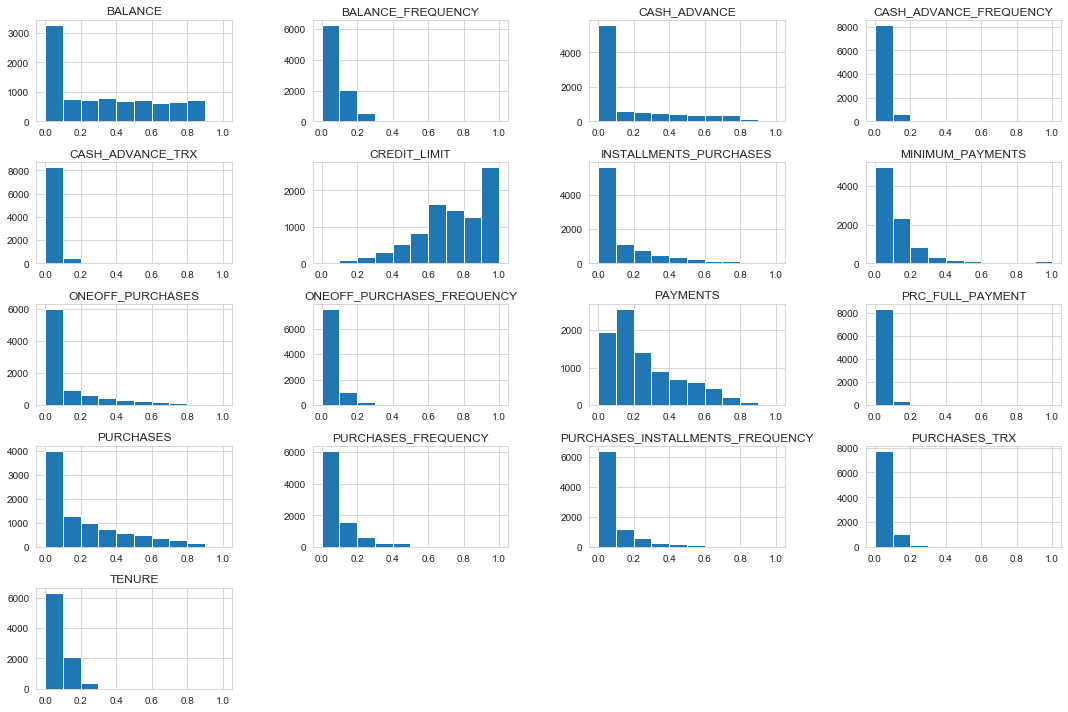

In [25]:
# plot histograms for each features
X.hist(figsize=(15,10))
plt.tight_layout()

Text(0.5, 1, 'Correlation Matrix')

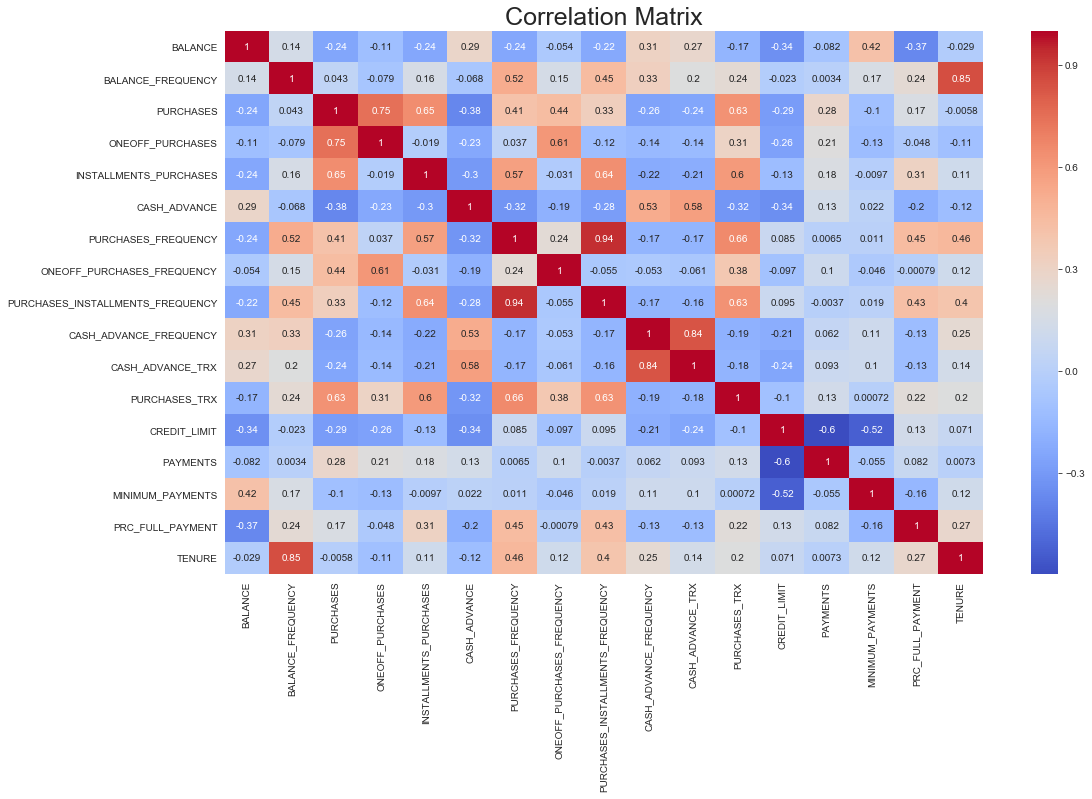

In [26]:
## Correlation matrix
plt.figure(figsize = (17, 10))
sns.heatmap(X.corr(), cmap = 'coolwarm', annot = True)
plt.title("Correlation Matrix", size = 25)


purchase frequency and purchase installment frequency are hightly correlated

### Remove Purchase Frequency

In [27]:
del X['PURCHASES_FREQUENCY']

Text(0.5, 1, 'Correlation Matrix')

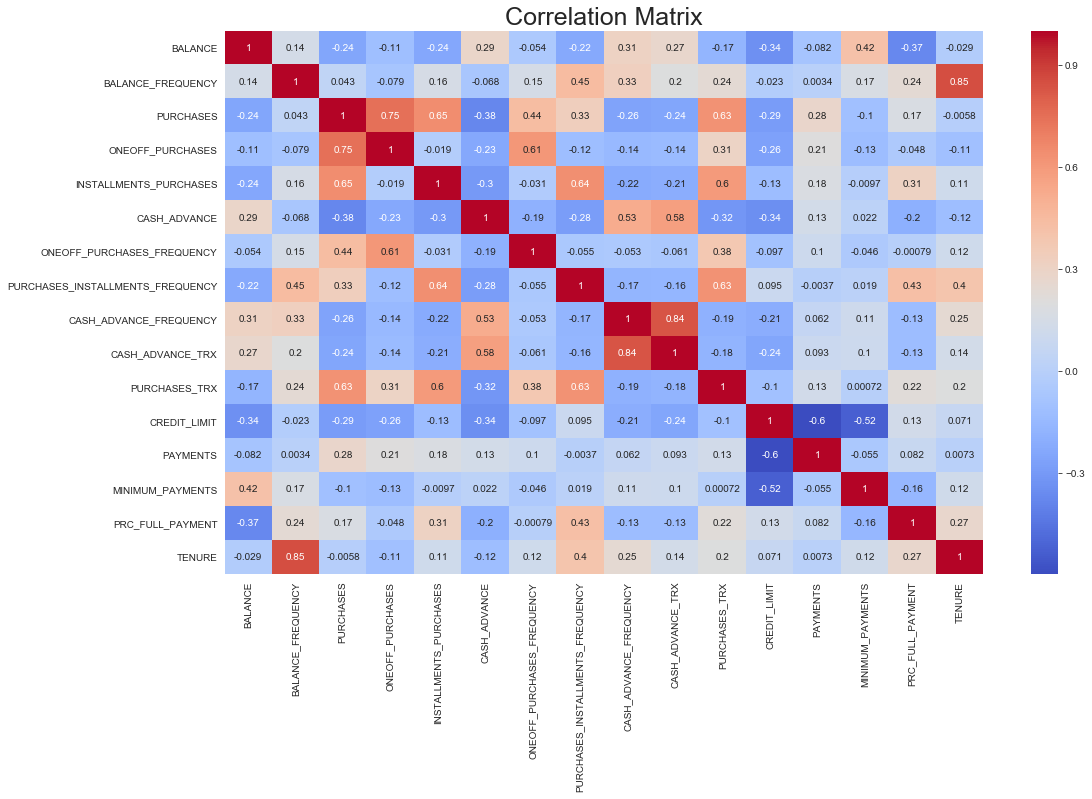

In [29]:
## Correlation matrix
plt.figure(figsize = (17, 10))
sns.heatmap(X.corr(), cmap = 'coolwarm', annot = True)
plt.title("Correlation Matrix", size = 25)

## K Means Cluster Creation

In [30]:
from sklearn.cluster import KMeans

In [31]:
# what is optimal number of clusters?
# Elbow method
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0.5, 0, 'K')

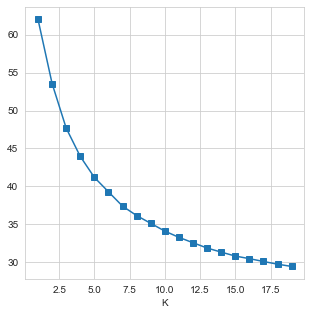

In [34]:
# plot
plt.figure(figsize = (5, 5))
plt.plot(range(1, 20), inertia, marker = 's')
plt.xlabel('K')

In [61]:
# unfortunately there is not really a obvious threshold, but I'll go with k = 5
# the goal here is to make this interpretable, so fewer is better
kmeans = KMeans(n_clusters=5, random_state=99).fit(X)

In [62]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.690667,0.097110,0.099554,0.057037,0.058096,0.145910,0.031975,0.049220,0.046374,0.034233,0.025533,0.673557,0.203667,0.273008,0.000341,0.083665,4.000000e+00
1,0.169315,0.129705,0.505635,0.063727,0.541634,0.024485,0.032835,0.305232,0.008037,0.005885,0.117099,0.699209,0.354503,0.124611,0.067840,0.119685,-9.325873e-15
2,0.085518,0.069149,0.139838,0.071570,0.090825,0.027228,0.039260,0.093061,0.008580,0.005352,0.036686,0.951505,0.155578,0.054431,0.031370,0.082059,2.000000e+00
3,0.239574,0.071376,0.604680,0.542213,0.138286,0.051090,0.133995,0.063456,0.014123,0.010972,0.084782,0.593278,0.400132,0.092678,0.017655,0.066512,3.000000e+00
4,0.387615,0.075544,0.060308,0.038141,0.031194,0.597802,0.018669,0.025037,0.083399,0.079743,0.012987,0.615155,0.370429,0.117693,0.007264,0.070179,1.000000e+00


In [63]:
# calculate centroids
centroids = kmeans.cluster_centers_

index = []
for C in range(len(pd.DataFrame(centroids))):
    index.append('C' + str(C))

columns = X.columns
centroid_X = pd.DataFrame(centroids, index, columns)
centroid_X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
C0,0.690667,0.097110,0.099554,0.057037,0.058096,0.145910,0.031975,0.049220,0.046374,0.034233,0.025533,0.673557,0.203667,0.273008,0.000341,0.083665,4.000000e+00
C1,0.169315,0.129705,0.505635,0.063727,0.541634,0.024485,0.032835,0.305232,0.008037,0.005885,0.117099,0.699209,0.354503,0.124611,0.067840,0.119685,-9.325873e-15
C2,0.085518,0.069149,0.139838,0.071570,0.090825,0.027228,0.039260,0.093061,0.008580,0.005352,0.036686,0.951505,0.155578,0.054431,0.031370,0.082059,2.000000e+00
C3,0.239574,0.071376,0.604680,0.542213,0.138286,0.051090,0.133995,0.063456,0.014123,0.010972,0.084782,0.593278,0.400132,0.092678,0.017655,0.066512,3.000000e+00
C4,0.387615,0.075544,0.060308,0.038141,0.031194,0.597802,0.018669,0.025037,0.083399,0.079743,0.012987,0.615155,0.370429,0.117693,0.007264,0.070179,1.000000e+00


### Adding the clusters to the dataset

In [64]:
df['Cluster'] = list(kmeans.labels_)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [65]:
# also add to X (scaled dataset)
X['Cluster'] = list(kmeans.labels_)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0.051631,0.270117,0.130110,0.000000,0.157081,0.000000,0.000000,0.069988,0.000000,0.000000,0.030473,0.961958,0.198540,0.134986,0.000000,0.297508,2
1,0.385568,0.028625,0.000000,0.000000,0.000000,0.727517,0.000000,0.000000,0.025149,0.016315,0.000000,0.640468,0.385000,0.098955,0.009889,0.024986,4
2,0.407770,0.042740,0.136513,0.151015,0.000000,0.000000,0.144798,0.000000,0.000000,0.000000,0.023670,0.933860,0.079231,0.078571,0.000000,0.035254,2
3,0.274061,0.027367,0.266305,0.294596,0.000000,0.031737,0.012141,0.000000,0.011449,0.005571,0.001985,0.939671,0.000000,0.039360,0.000000,0.035496,2
4,0.661625,0.211607,0.013987,0.015472,0.000000,0.000000,0.059741,0.000000,0.000000,0.000000,0.009766,0.738666,0.427754,0.151814,0.000000,0.189344,0


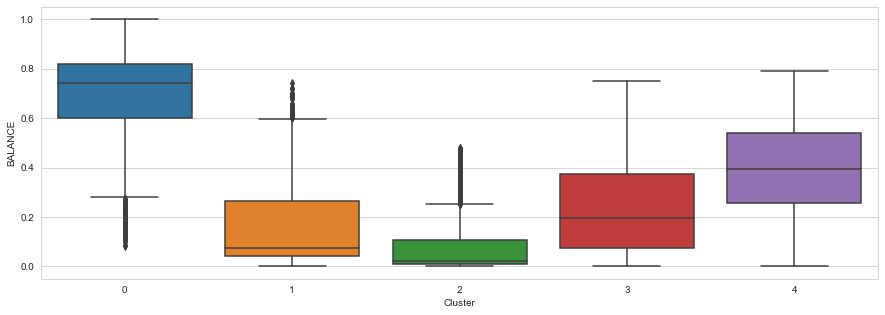

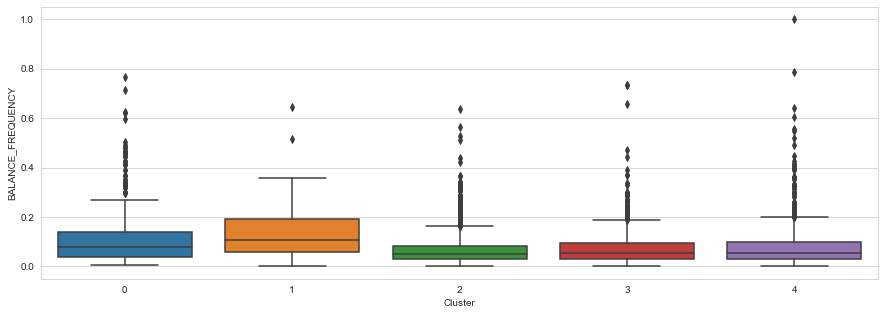

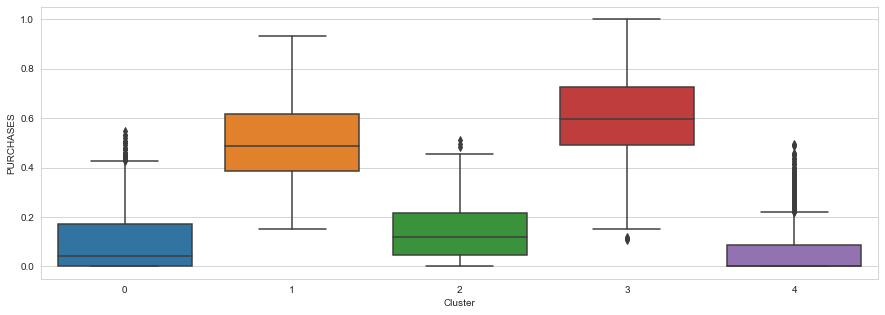

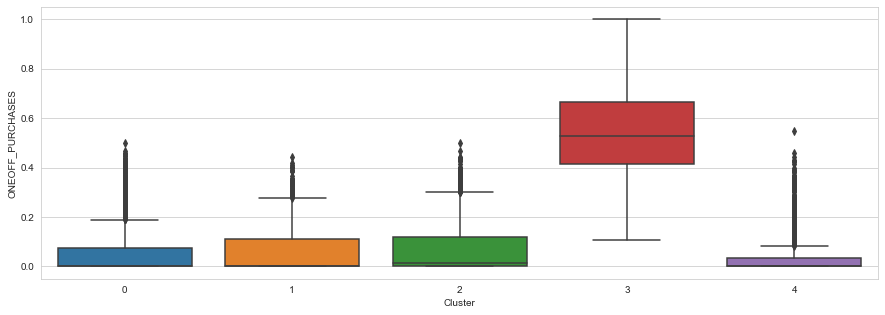

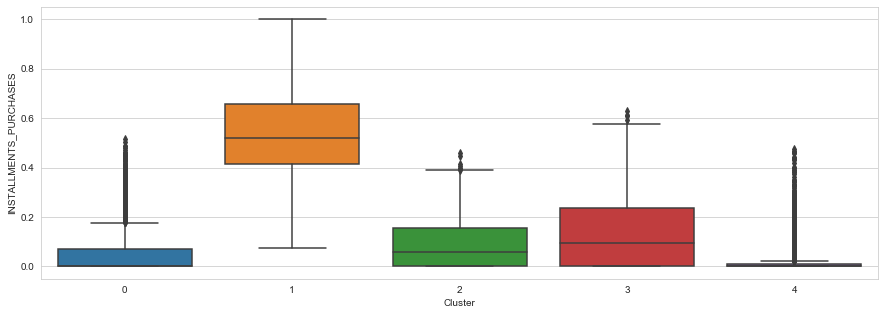

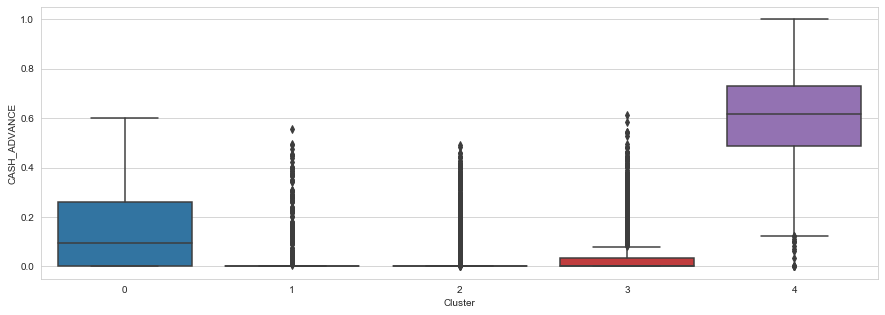

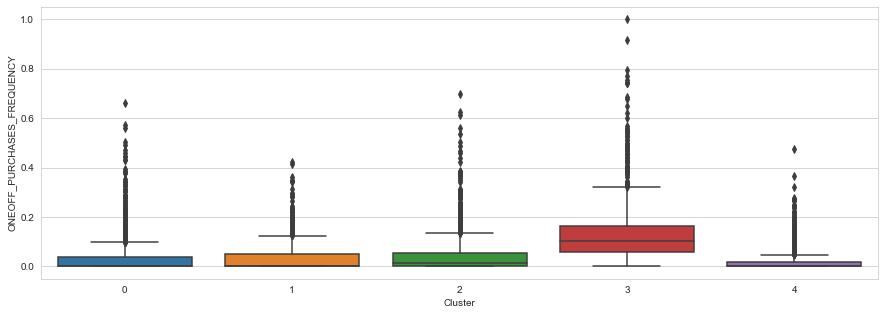

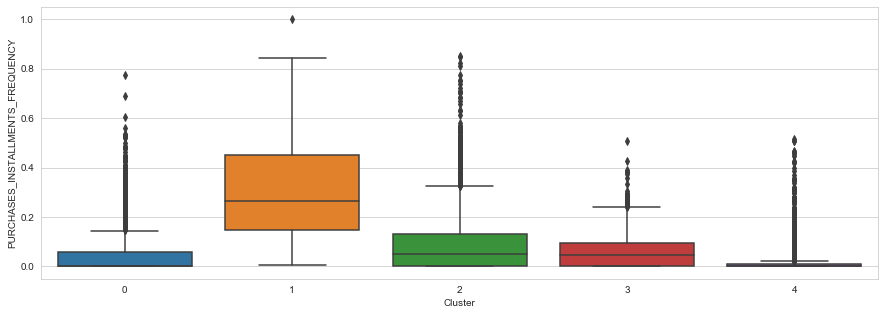

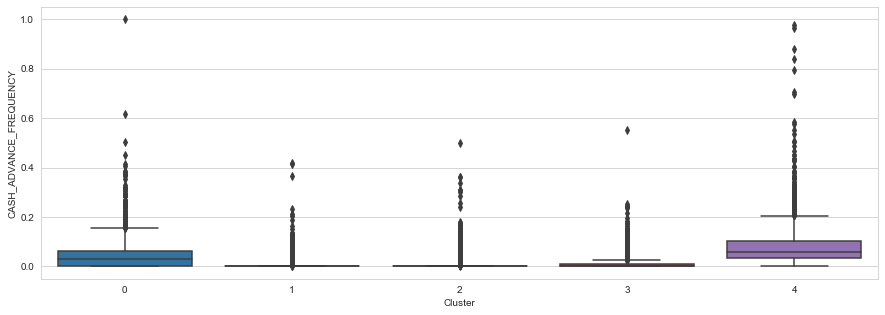

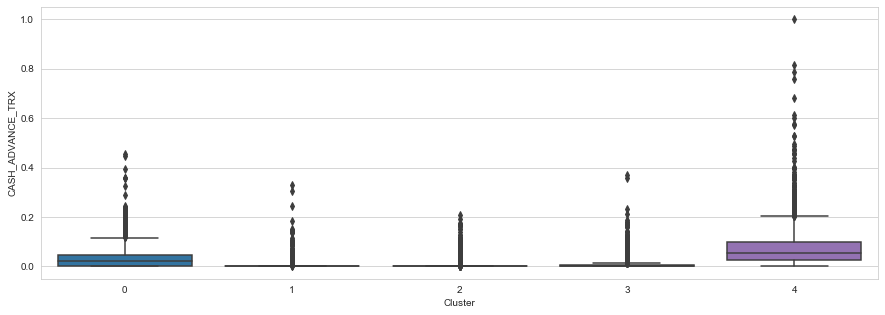

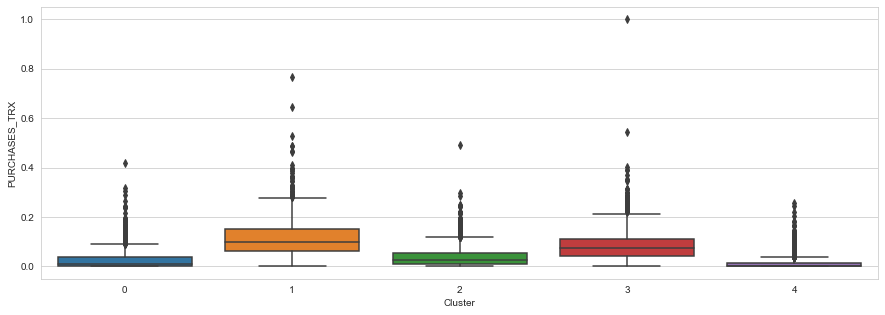

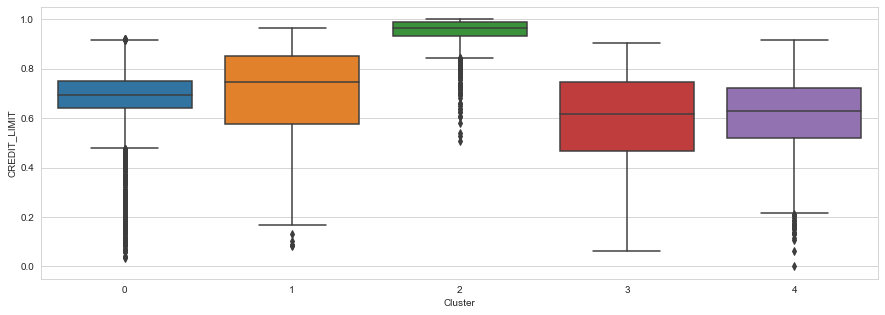

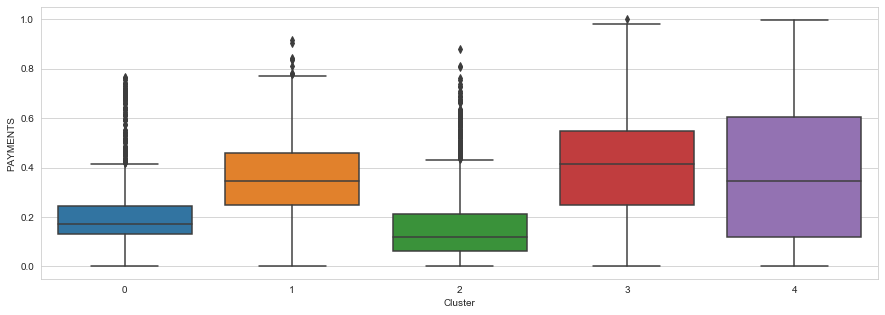

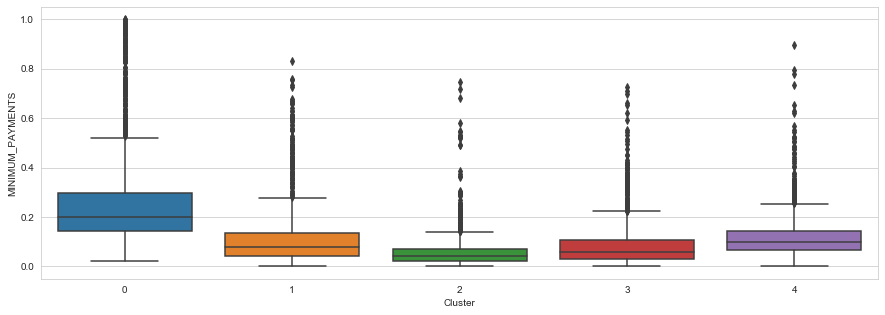

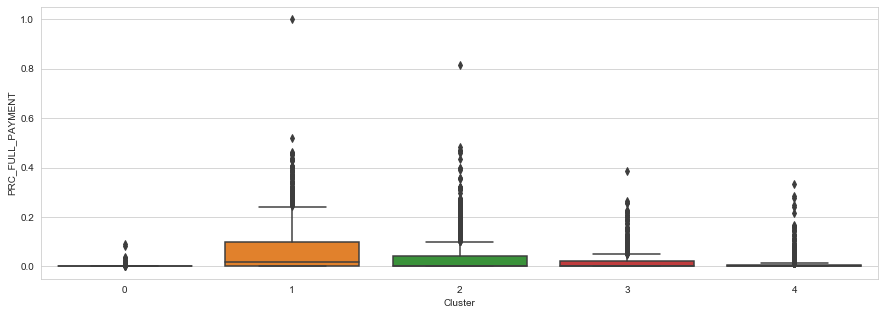

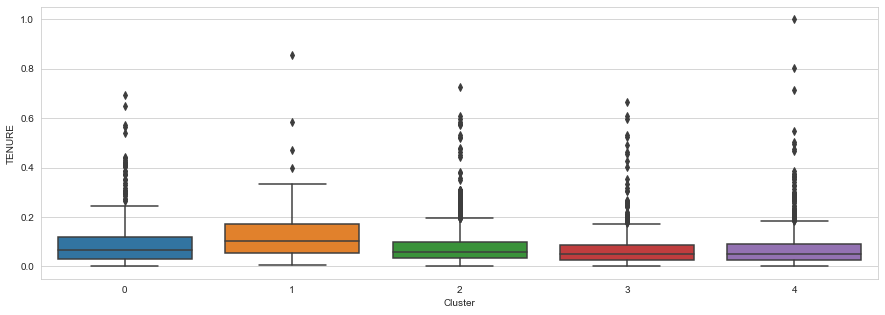

In [66]:
# plot boxplots for all features
for feat in X.loc[:, X.columns != 'Cluster'].columns:
    plt.figure(figsize = (15, 5))
    sns.boxplot(x = 'Cluster', y = feat, data=X)
#    plt.tight_layout()

### how may are in each cluster?

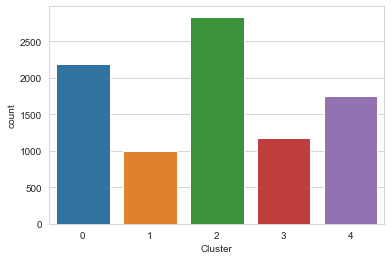

In [67]:
sns.countplot(X['Cluster'])

# Calculate effect sizes for each cluster

* Cohen's d = effect size
* way to describe results in terms of measure of magniture
* = standardized mean difference between each cluster from the rest of the users
* d = 1 means cluster mean differs from group mean by 1 SD
* |d| > 0.8 is considered "large effect"

In [68]:
from statistics import mean, stdev
from math import sqrt

# do for all features and all clusters

# make new dataframe (cohens_d) with each feature having one row
features = list(X.columns)
features.pop()
cohens_d = pd.DataFrame(features, columns=["Features"])

for cluster in set(X['Cluster']):
    # calculate effect sizes for one cluster
    d=[]
    for feat in cohens_d['Features']:
        # test conditions
        clust = X[feat][X['Cluster'] == cluster]
        rest = X[feat][X['Cluster'] != cluster]
        d.append((mean(clust) - mean(rest)) / (sqrt((stdev(clust) ** 2 + stdev(rest) ** 2) / 2)))
    # add to dataframe
    cohens_d['C' + str(cluster)] = d
    


In [69]:
cohens_d

,Features,C0,C1,C2,C3,C4
0,BALANCE,2.594902,-0.702318,-1.626963,-0.383871,0.320910
1,BALANCE_FREQUENCY,0.227545,0.642950,-0.312738,-0.210619,-0.147247
2,PURCHASES,-0.788374,1.730987,-0.551441,2.635275,-1.051077
3,ONEOFF_PURCHASES,-0.520937,-0.413335,-0.432300,3.496639,-0.660841
4,INSTALLMENTS_PURCHASES,-0.569882,3.283844,-0.319865,0.072507,-0.794901
5,CASH_ADVANCE,-0.148894,-0.862113,-1.047680,-0.690665,3.510729
6,ONEOFF_PURCHASES_FREQUENCY,-0.238146,-0.197904,-0.116475,1.092255,-0.498021
7,PURCHASES_INSTALLMENTS_FREQUENCY,-0.416621,1.536109,0.046726,-0.250139,-0.687337
8,CASH_ADVANCE_FREQUENCY,0.281130,-0.553260,-0.670915,-0.415720,0.887885
9,CASH_ADVANCE_TRX,0.162423,-0.552216,-0.700314,-0.416114,0.964669


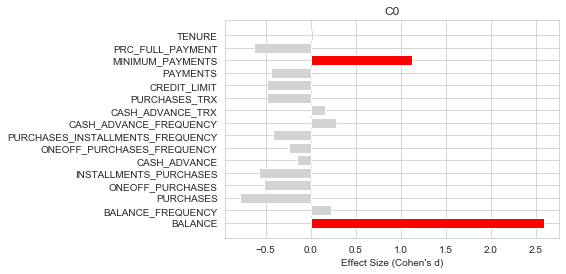

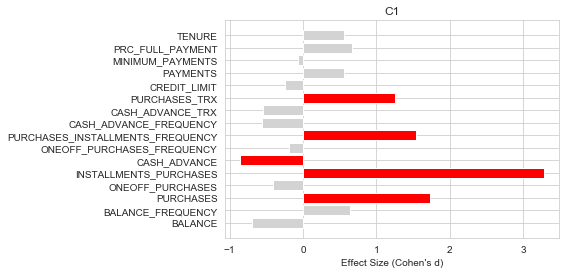

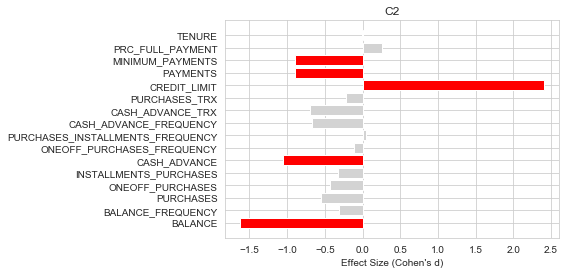

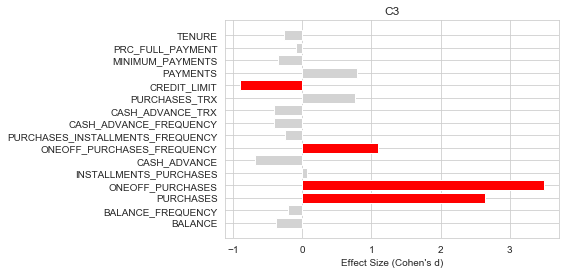

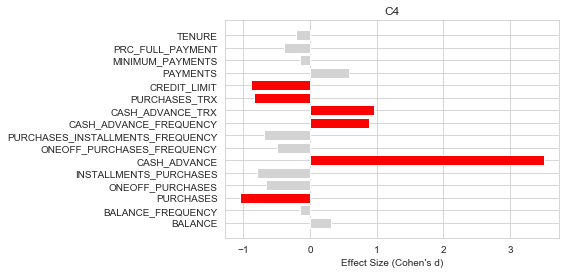

In [80]:
# plot effect sized for each cluster
# Effect size (Cohen's d) quantifies magnitude of difference of each cluster from the rest
# 1 effect size (d = 1) represents 1SD away from the rest (mean of cluster vs. mean of rest of group)
# d > 0.8 is considered 'large effect'

for cluster in list(cohens_d.columns[1:]):
    
    # plot effect sizes
    height = cohens_d[cluster]
    bars = cohens_d['Features']
    y_pos = np.arange(len(bars))
    
    # show features with large effect in red
    mask1 = abs(height) > 0.8
    mask2 = abs(height) <= 0.8

     #plt.figure(figsize = (9, 6))
    plt.barh(y_pos[mask1], height[mask1], color = 'red')
    plt.barh(y_pos[mask2], height[mask2], color = 'lightgrey')
    plt.yticks(y_pos, bars)
    plt.xlabel("Effect Size (Cohen's d)")
    plt.title(cluster)

    plt.show()

# Description of customer types (clusters)
## Used for targeted Marketing Strategy

In [93]:
# what fraction is in each cluster?
print("Cluster 0: " + str(round(len(X['Cluster'][X['Cluster'] == 0]) / len(X) * 100)) + "%")
print("Cluster 1: " + str(round(len(X['Cluster'][X['Cluster'] == 1]) / len(X) * 100)) + "%")
print("Cluster 2: " + str(round(len(X['Cluster'][X['Cluster'] == 2]) / len(X) * 100)) + "%")
print("Cluster 3: " + str(round(len(X['Cluster'][X['Cluster'] == 3]) / len(X) * 100)) + "%")
print("Cluster 4: " + str(round(len(X['Cluster'][X['Cluster'] == 4]) / len(X) * 100)) + "%")


Cluster 0: 24%
Cluster 1: 11%
Cluster 2: 32%
Cluster 3: 13%
Cluster 4: 20%


# Business Insights
## Description of customer type and targeted recommendations

### Cluster 0: Credit Card Debtsters
(24% of customer base)
* keep high balance
* only make minimum payments

**Targeted Benefits to new customers:**
* offer **balance transfers** with low introductory rates


### Cluster 1: Installment Spenders
(11% of customer base)
* high spenders
* use card primarily on recurrend installments (e.g., bills)

**Targeted Benefits to new customers:**
* offer **recurrent bill payment incentives** for the first year (e.g., points, travel, cash back, etc.)


### Cluster 2: Credit Card Collectors
(32% of customer base)
* they have a huge credit limit
* do not tend to use their card much, and always pay off their bill right away
* they likely use it as a back up card

**Targeted Benefits to new customers:**
* we don't want attrackt more of this type of customer, because they don't make us any money


### Cluster 3: Shoppers
(13% of customer base)
* high spenders (mostly on one-off purchases)
* low credit limit

**Targeted Benefits to new customers:**
* offer **purchase incentives** for the first year (e.g., points, travel, cash back, etc.)


### Cluster 4: Cash Grabbers
(203% of customer base)
* use card primarily for cash advances and not to make purchases
* low credit limit

**Targeted Benefits to new customers:**
* offer **low introductory cash advance fee** for the first year
